In [1]:
# Import required packages and functions
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC, SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set seed and test proportion
seed = 123
test_p = 0.20

# Import data
homes = pd.read_csv('https://raw.githubusercontent.com/mh2t/CS6140/main/data/homes.csv').dropna()

In [2]:
# Linear regression model

# Define input and output features
X = homes[['Floor']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=True, test_size=test_p)

# Metrics for simple linear regression
lin_reg = LinearRegression().fit(X_train, y_train)
y_hat = lin_reg.predict(X_test)
print(f'MSE = {mean_squared_error(y_test, y_hat)}')
print(f'MAE = {mean_absolute_error(y_test, y_hat)}')
print(f'R-squared = {r2_score(y_test, y_hat)}')

MSE = 4377.548634520407
MAE = 53.02646796077678
R-squared = 0.07881601353080447


In [3]:
# Multiple regression model

# Define input and output features
X = homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=True, test_size=test_p)

# Metrics for multiple regression
mult_reg = LinearRegression().fit(X_train, y_train)
y_hat = mult_reg.predict(X_test)

print(f'MSE = {mean_squared_error(y_test, y_hat)}')
print(f'MAE = {mean_absolute_error(y_test, y_hat)}')
print(f'R-squared = {r2_score(y_test, y_hat)}')

MSE = 4033.19105080219
MAE = 51.556500029678816
R-squared = 0.15128047211818474


In [4]:
# Fit simple linear regression model
X = homes[['Floor']]
y = homes[['Price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_p, shuffle=True)
lin_reg = LinearRegression().fit(X_train, y_train)
y_hat = lin_reg.predict(X_test)

# 10-fold cross-validation scores
mse = make_scorer(mean_squared_error)
kf_preds = []
kf = KFold(n_splits=10)
kf_scores = cross_val_score(lin_reg, X, y, cv = kf, scoring=mse)

# Leave-one-out cross-validation scores
loocv = LeaveOneOut()
loocv_scores = cross_val_score(lin_reg, X, y, cv = loocv, scoring=mse)
X = homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]
kf_scores_multi = cross_val_score(mult_reg, X, y, cv = kf, scoring=mse)
loocv_scores_multi = cross_val_score(mult_reg, X, y, cv = loocv, scoring=mse)

In [5]:
# Combine cross-validation results into a single dataframe
scores = [kf_scores, loocv_scores, kf_scores_multi, loocv_scores_multi]
model_list = ['Linear', 'Linear', 'Multiple', 'Multiple']
cv_list = ['10-fold', 'LOOCV', '10-fold', 'LOOCV']
dict_list = []
for i, score_list in enumerate(scores):
  for score in score_list:
    dict_list.append({'MSE':score, 'Model':model_list[i], 'CV':cv_list[i]})

results = pd.DataFrame(dict_list)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(results)

              MSE     Model       CV
0    10074.316093    Linear  10-fold
1     2001.671119    Linear  10-fold
2     2294.948987    Linear  10-fold
3     2324.134929    Linear  10-fold
4     2144.582195    Linear  10-fold
5     3077.004406    Linear  10-fold
6     4152.181758    Linear  10-fold
7     2462.945159    Linear  10-fold
8     3111.332050    Linear  10-fold
9     4076.135789    Linear  10-fold
10    8580.809100    Linear    LOOCV
11   26206.700200    Linear    LOOCV
12    8816.022914    Linear    LOOCV
13   10904.756031    Linear    LOOCV
14   15184.494251    Linear    LOOCV
15    4403.799846    Linear    LOOCV
16    1395.685040    Linear    LOOCV
17    9734.978061    Linear    LOOCV
18     177.195323    Linear    LOOCV
19    2001.208252    Linear    LOOCV
20    3940.157629    Linear    LOOCV
21     944.770681    Linear    LOOCV
22     242.890415    Linear    LOOCV
23    3887.093024    Linear    LOOCV
24    1640.134659    Linear    LOOCV
25    3181.149195    Linear    LOOCV
2

<Figure size 800x400 with 0 Axes>

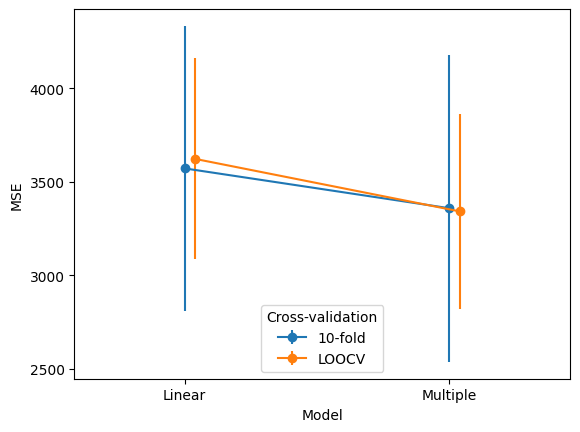

In [6]:
plt.figure(figsize=(8, 4))

# Plot error bars
linear_10_fold = results.query('Model == "Linear" & CV == "10-fold"')
multiple_10_fold = results.query('Model == "Multiple" & CV == "10-fold"')
linear_loocv = results.query('Model == "Linear" & CV == "LOOCV"')
multiple_loocv = results.query('Model == "Multiple" & CV == "LOOCV"')

lin_10_fold_se = linear_10_fold['MSE'].sem()
lin_loocv_se = linear_loocv['MSE'].sem()
mul_10_fold_se = multiple_10_fold['MSE'].sem()
mul_loocv_se = multiple_loocv['MSE'].sem()

lin_10_mean = np.mean(linear_10_fold['MSE'])
lin_lo_mean = np.mean(linear_loocv['MSE'])
mul_10_mean = np.mean(multiple_10_fold['MSE'])
mul_lo_mean = np.mean(multiple_loocv['MSE'])

dict_10_fold = {'Model':['Linear', 'Multiple'],
         'MSE':[lin_10_mean, mul_10_mean],
         }

df_10_fold = pd.DataFrame(dict_10_fold)

dict_lo = {'Model':['Linear', 'Multiple'],
           'MSE':[lin_lo_mean, mul_lo_mean]}

df_lo = pd.DataFrame(dict_lo)

errors_10 = [lin_10_fold_se, mul_10_fold_se]
errors_lo = [lin_loocv_se, mul_loocv_se]

fig, ax = plt.subplots()

from matplotlib.transforms import Affine2D

trans2 = Affine2D().translate(+0.04, 0.0) + ax.transData
er1 = ax.errorbar(df_10_fold['Model'], df_10_fold['MSE'], yerr=errors_10, marker="o")
er2 = ax.errorbar(df_lo['Model'], df_lo['MSE'], yerr=errors_lo, marker="o", transform=trans2)
ax.yaxis.set_major_locator(plt.MaxNLocator(4))
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.margins(x=0.4)
plt.legend(['10-fold', 'LOOCV'], title='Cross-validation', loc='lower center')

plt.show()

In [7]:
# Import required packages and functions
seed = 123

cancer = pd.read_csv('https://raw.githubusercontent.com/mh2t/CS6140/main/data/WisconsinBreastCancerDatabase.csv').dropna()
cancer = cancer.replace(to_replace=['M', 'B'], value=[int(1), int(0)])
cancer

/var/folders/47/j7xk0sv9377_9d8p96_xf4hr0000gn/T/ipykernel_1595/384081357.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer = cancer.replace(to_replace=['M', 'B'], value=[int(1), int(0)])


,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


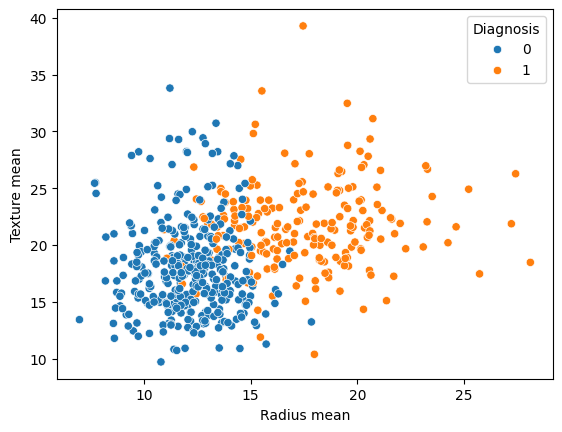

In [8]:
# Visual exploration
sns.scatterplot(data=cancer, x='Radius mean', y='Texture mean', hue='Diagnosis')

plt.show()

In [9]:
# Define input and output features based on the scatterplot variables.
X = cancer[['Radius mean', 'Texture mean']]
y = cancer[['Diagnosis']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Scale the input features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

/Users/richardyue/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


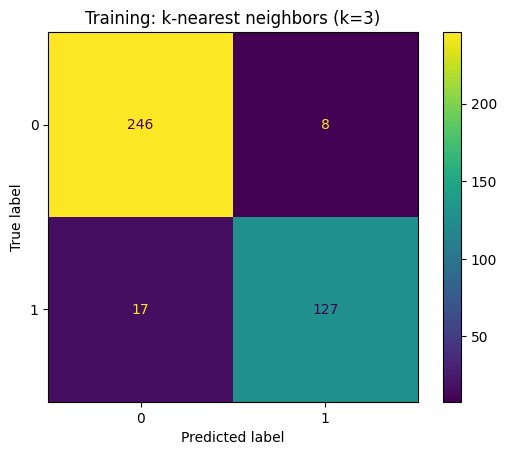

Accuracy: 0.9371859296482412
Precision: 0.9407407407407408
Recall: 0.8819444444444444


In [10]:
# Fit k-nearest neighbors with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(scaled_X_train, y_train)
y_hat = neigh.predict(scaled_X_train)
y_train = y_train

# Confusion matrix
cf_matrix = confusion_matrix(y_train, y_hat, labels=neigh.classes_)
cmTrain_plot = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                                      display_labels=neigh.classes_)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=3)")
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_hat)
precision = precision_score(y_train, y_hat)
recall = recall_score(y_train, y_hat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Users/richardyue/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


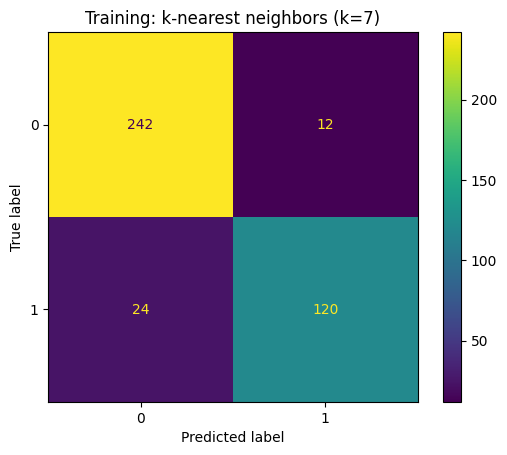

Accuracy: 0.9095477386934674
Precision: 0.9090909090909091
Recall: 0.8333333333333334


In [11]:
# Fit k-nearest neighbors with k=7
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(scaled_X_train, y_train)
y_hat = neigh.predict(scaled_X_train)

# Confusion matrix
cf_matrix = confusion_matrix(y_train, y_hat, labels=neigh.classes_)
cmTrain_plot = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                                      display_labels=neigh.classes_)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=7)")
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_hat)
precision = precision_score(y_train, y_hat)
recall = recall_score(y_train, y_hat)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Users/richardyue/miniconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


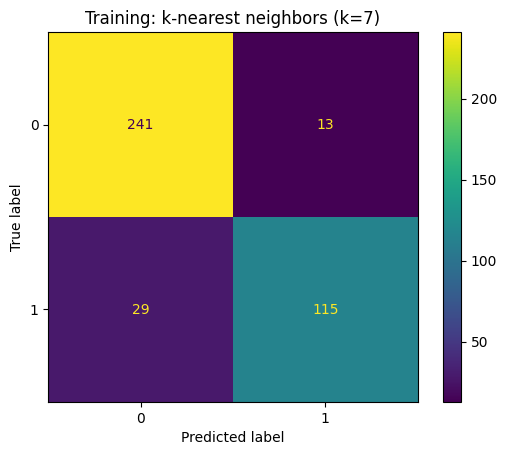

Accuracy: 0.8944723618090452
Precision: 0.8984375
Recall: 0.7986111111111112


In [12]:
# Fit k-nearest neighbors with k=7
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(scaled_X_train, y_train)
y_hat = neigh.predict(scaled_X_train)

# Confusion matrix
cf_matrix = confusion_matrix(y_train, y_hat, labels=neigh.classes_)
cmTrain_plot = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                                      display_labels=neigh.classes_)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: k-nearest neighbors (k=7)")
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_hat)
precision = precision_score(y_train, y_hat)
recall = recall_score(y_train, y_hat)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Users/richardyue/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


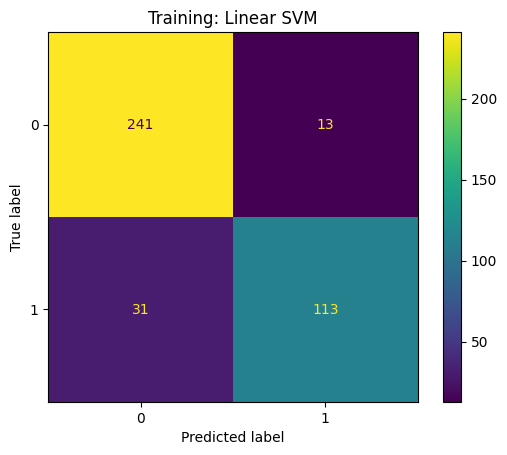

Accuracy: 0.8894472361809045
Precision: 0.8968253968253969
Recall: 0.7847222222222222


In [13]:
# Fit SVM with the linear kernel
svm = SVC(kernel='linear').fit(scaled_X_train, y_train)
y_hat = svm.predict(scaled_X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_hat)
cmTrain_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=svm.classes_)

cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Linear SVM")
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_hat)
precision = precision_score(y_train, y_hat)
recall = recall_score(y_train, y_hat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Users/richardyue/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


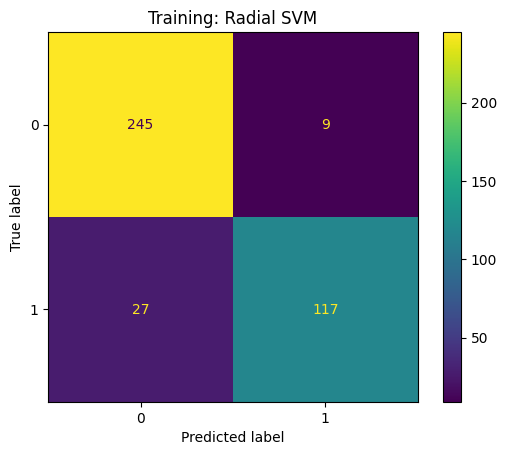

Accuracy: 0.9095477386934674
Precision: 0.9285714285714286
Recall: 0.8125


In [14]:
# Fit SVM with the Radial Basis Function kernel
svm = SVC(kernel='rbf').fit(scaled_X_train, y_train)
y_hat = svm.predict(scaled_X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_hat, labels=svm.classes_)
cmTrain_plot = ConfusionMatrixDisplay(cm, display_labels=svm.classes_)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Radial SVM")
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_hat)
precision = precision_score(y_train, y_hat)
recall = recall_score(y_train, y_hat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

/Users/richardyue/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


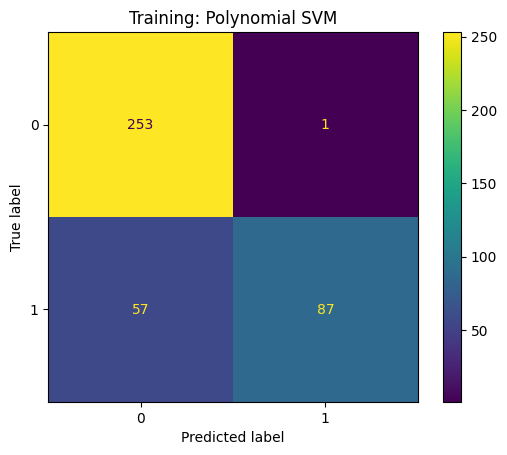

Accuracy: 0.8542713567839196
Precision: 0.9886363636363636
Recall: 0.6041666666666666


In [15]:
# Fit SVM with the polynomila kernel


svm = SVC(kernel='poly').fit(scaled_X_train, y_train)
y_hat = svm.predict(scaled_X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_hat, labels=svm.classes_)
cmTrain_plot = ConfusionMatrixDisplay(cm, display_labels=svm.classes_)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title("Training: Polynomial SVM")
plt.show()

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_hat)
precision = precision_score(y_train, y_hat)
recall = recall_score(y_train, y_hat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)